## 0. Importando as bibliotecas 

In [325]:
# Bibliotecas para manipulção de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Bibliotecas para preprocessamento de dados 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Bibliotecas utilizadas na Construção de Máquinas Preditivas
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost 
from xgboost import XGBRegressor

# Bibliotecas para tunning de hiperparâmetros 
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Bibliotecas utilizadas na Avaliação das Máquinas
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

## 1. Carregando o dataset e fazendo uma primeira análise

In [326]:
df = pd.read_csv('crop_production.csv')

In [327]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [328]:
df.shape

(246091, 7)

In [329]:
df.nunique()

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             38442
Production       51627
dtype: int64

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [331]:
df['Crop_Year'] = pd.to_datetime(df['Crop_Year'])

In [332]:
df['Crop'].value_counts()

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [333]:
df['State_Name'].value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

In [334]:
df['Season'].value_counts()

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64

In [335]:
df['District_Name'].value_counts()

BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

In [336]:
df.describe()

,Area,Production
count,2.460910e+05,2.423610e+05
mean,1.200282e+04,5.825034e+05
std,5.052340e+04,1.706581e+07
min,4.000000e-02,0.000000e+00
25%,8.000000e+01,8.800000e+01
50%,5.820000e+02,7.290000e+02
75%,4.392000e+03,7.023000e+03
max,8.580100e+06,1.250800e+09


## 2. Limpeza dos dados

In [337]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [338]:
df = df.dropna().copy()

In [339]:
df.shape

(242361, 7)

## 3. Análise Exploratória 

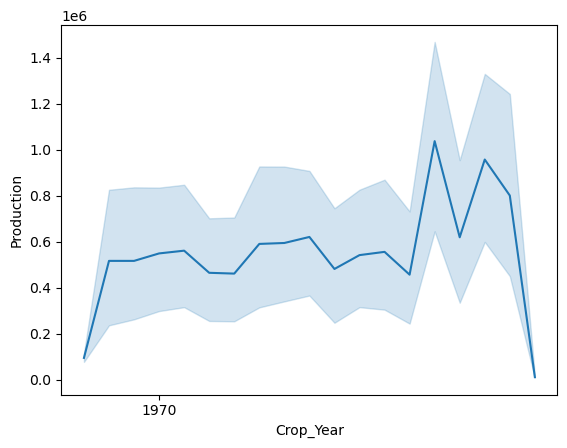

In [340]:
# Explorando e Visualizando os dados com panorama geral

# Vamos ver a produção total por ano de duas formas diferentes, usando apenas o seaborn e depos criando um subset

sns.lineplot(df["Crop_Year"],df["Production"])

plt.show()

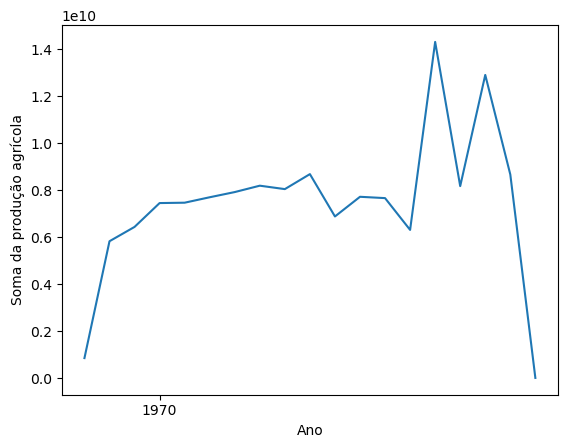

In [341]:
# Agrupando os dados por ano e calculando a soma da produção agrícola
soma_producao_ano = df.groupby("Crop_Year")["Production"].sum().reset_index()

# Criando o gráfico de linha com Seaborn
sns.lineplot(data=soma_producao_ano, x="Crop_Year", y="Production")

# Definindo os rótulos dos eixos
plt.xlabel("Ano")
plt.ylabel("Soma da produção agrícola")
plt.show()

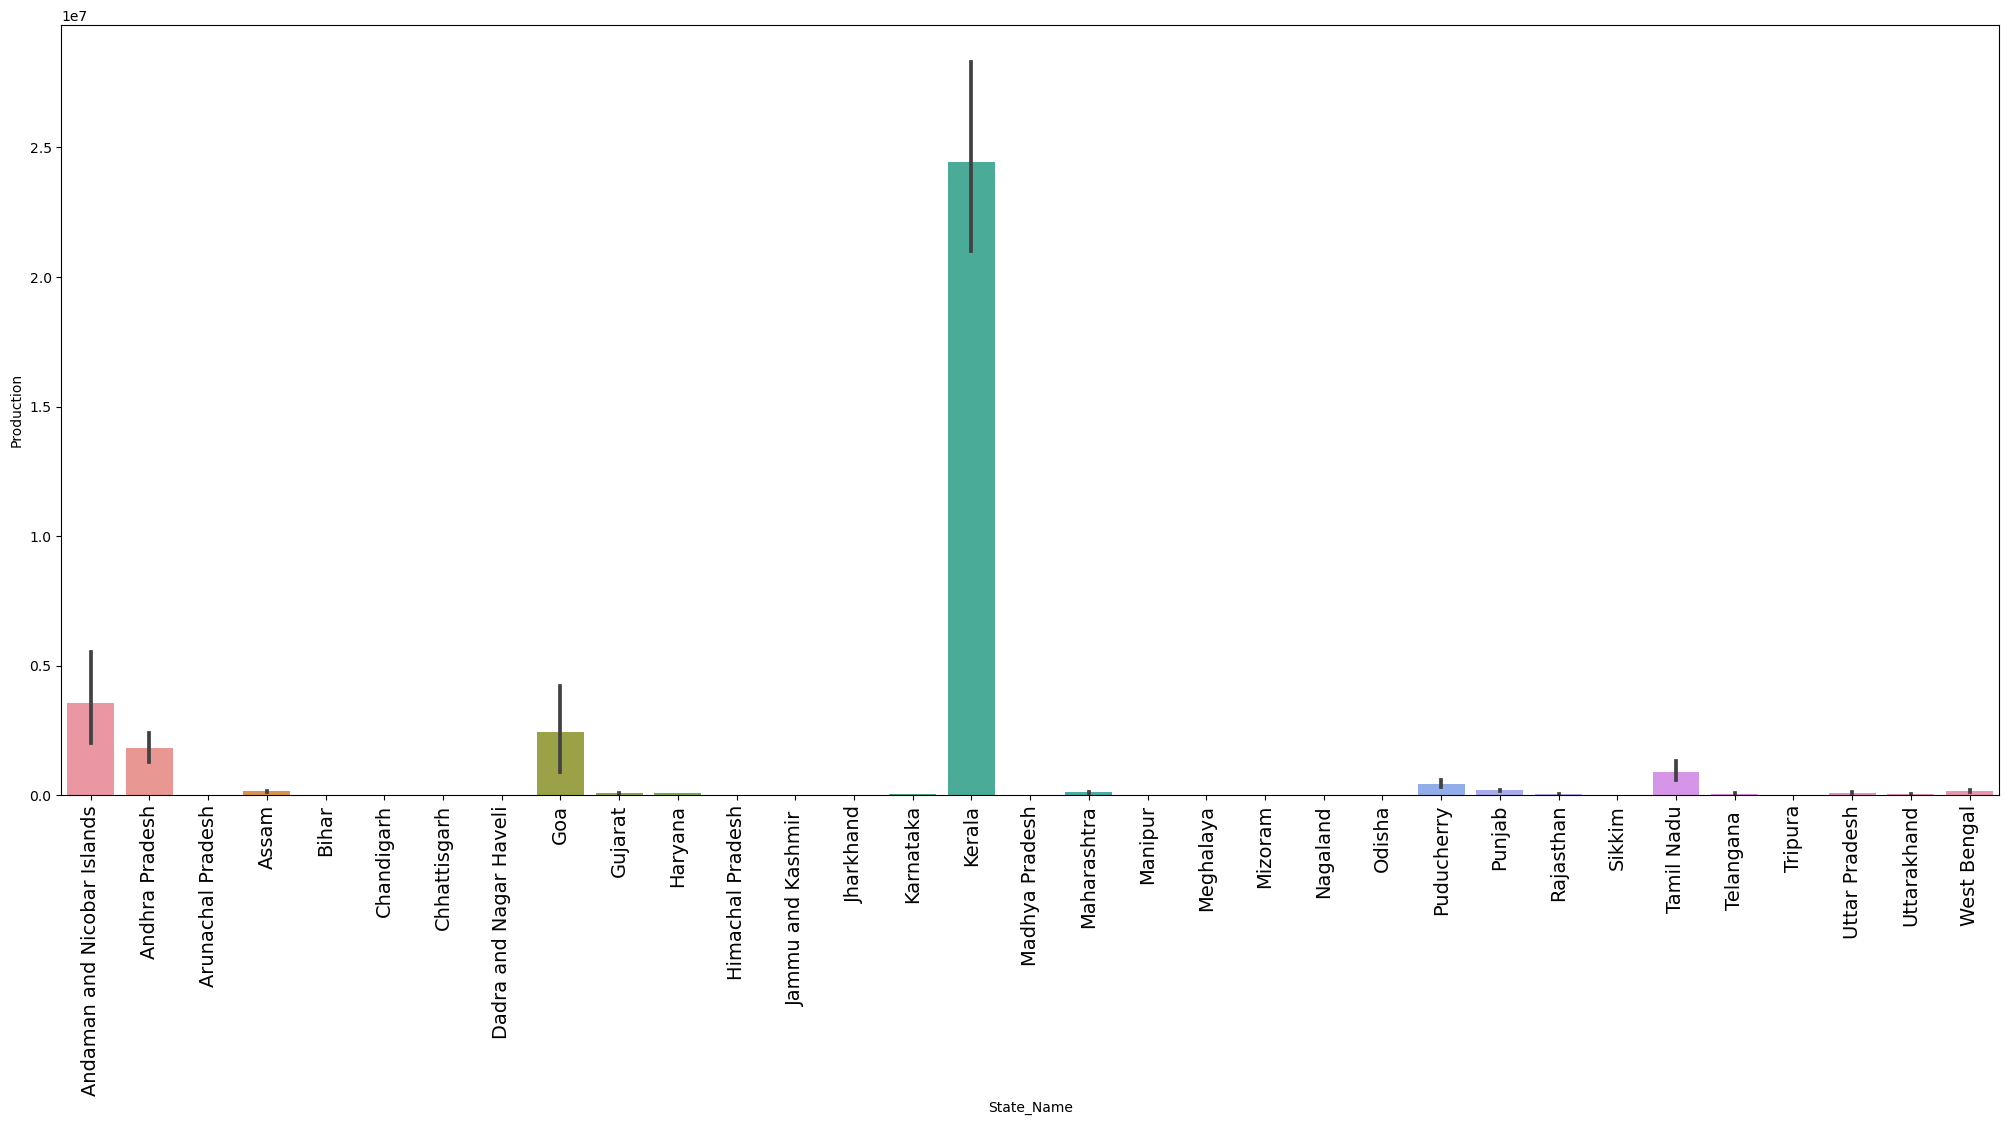

In [342]:
# Plotando um gráfico de barras para termos noção da produtividade de cada estado
# nota-se que dessa maneira o seaborn nos entrega a MÉDIA de cada esatdo

plt.figure(figsize=(25,10))
sns.barplot(df["State_Name"],df["Production"])
plt.xticks(rotation=90, fontsize=14)
plt.show()

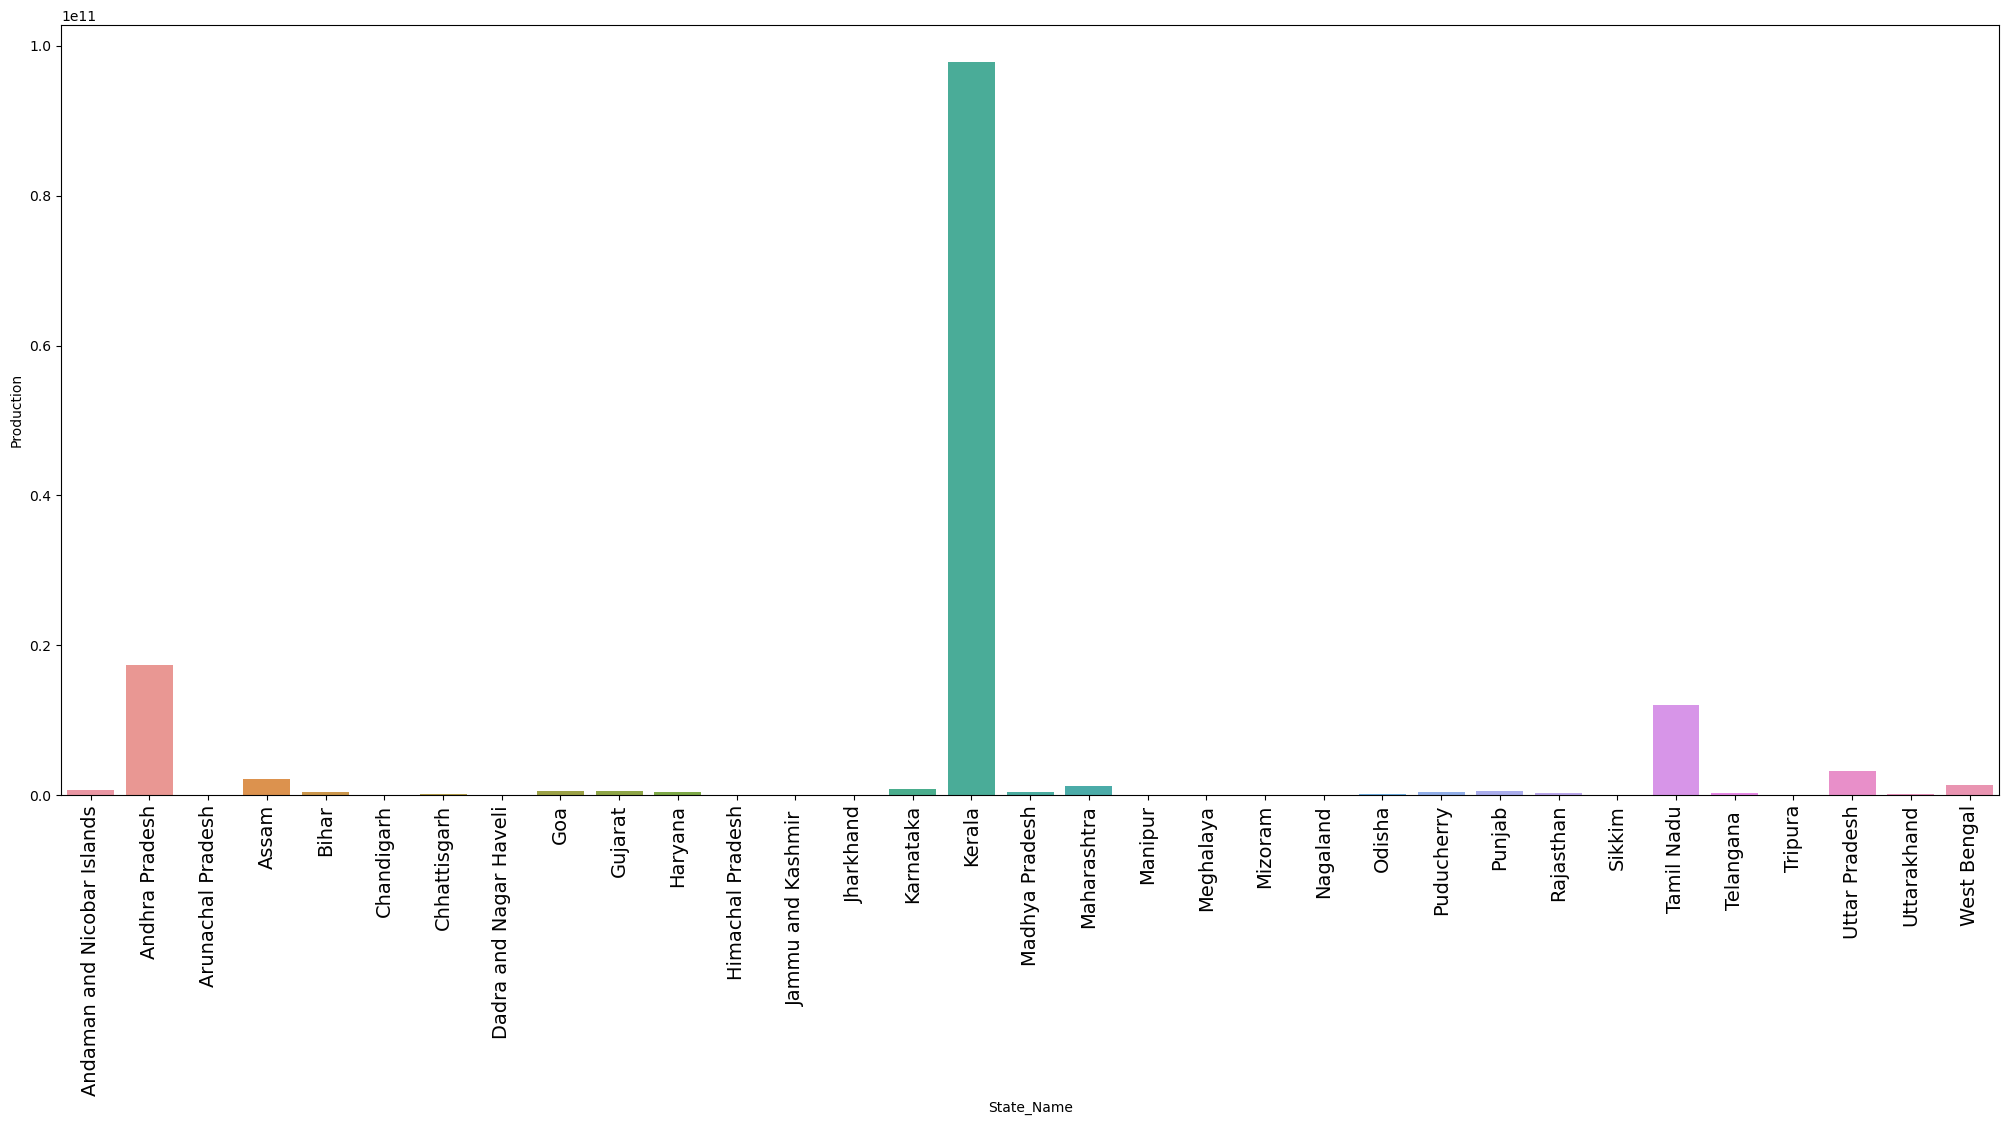

In [343]:
# E fazendo manualmente, eis aqui a soma da produção de cada estado
# Descobri que poderia ser feito maís rápido apenas mudando o parâmetro estimator

df_states = df[['State_Name', 'Production']].groupby('State_Name').sum().reset_index()

plt.figure(figsize=(25,10))
sns.barplot(data=df_states, x='State_Name', y='Production')
plt.xticks(rotation=90, fontsize=14)
plt.show()

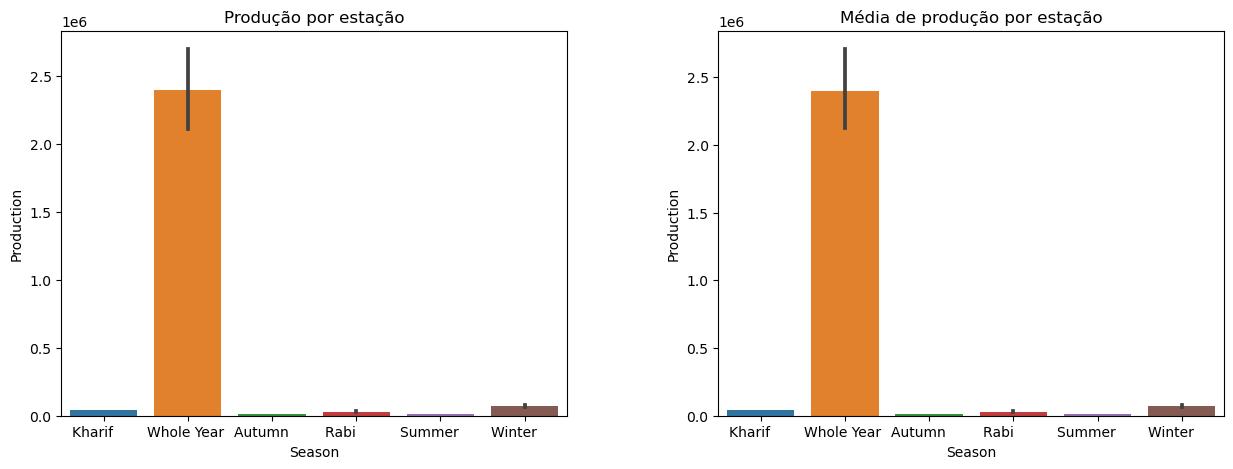

In [344]:
# Agora vamos vamos plotar um ao lado do outro com o subplot, a média e a soma, sendo os dois muito parecidos

# Cria a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plota o primeiro subplot
sns.barplot(x='Season', y='Production', data=df, ax=axs[0])
axs[0].set_title('Produção por estação')

# Plota o segundo subplot
sns.barplot(x='Season', y='Production', data=df, ax=axs[1])
axs[1].set_title('Média de produção por estação')

# Ajusta o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.3)

# Exibe o gráfico
plt.show()

Os insights que extraimos dessa primeira análise são:

1- Em 2010, após uma pequena queda, a produtividade aumenta muito rapidamente, e em 2012 declina e chega em 2015 muito baixa 


2- O estado de Kerala é disparado o que apresenta maior produtividade 


3- A produção de cultura categorizado em Whole Year é a imensa maioria da produtividade.


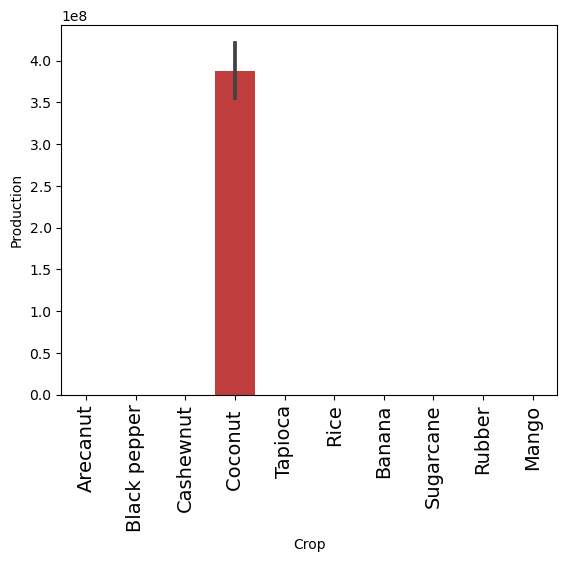

In [345]:
# A partir dessas informações vamos ver quais são as culturas que se destacam em Kerala e sua proditividade com o tempo


# filtrar as linhas do dataframe para incluir apenas as do estado de Kerala
df_kerala = df[df['State_Name'] == 'Kerala']

# calcular a produção total de cada crop em Kerala
df_crop_production = df_kerala.groupby('Crop')['Production'].sum().reset_index()

# selecionar as top crops com base na produção
top_crops = df_crop_production.nlargest(10, 'Production')['Crop'].values

# plotar o gráfico com as top crops
sns.barplot(x='Crop', y='Production', data=df_kerala[df_kerala['Crop'].isin(top_crops)])
plt.xticks(rotation=90, fontsize=14)
plt.show()



<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

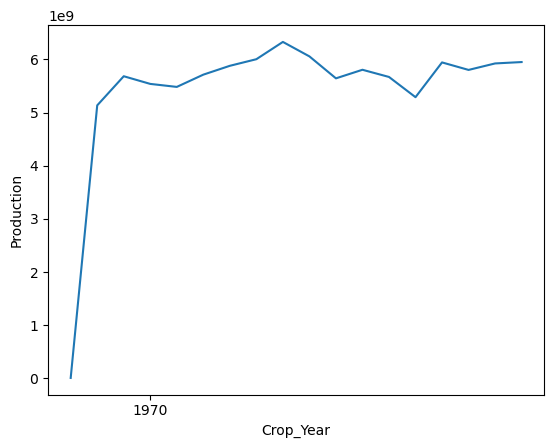

In [346]:
# agrupar as linhas por ano e calcular a produção total de Kerala em cada ano
df_kerala_byy = df_kerala.groupby('Crop_Year')['Production'].sum().reset_index()

# plotar o gráfico de linha com a produção de Kerala ao longo do tempo
sns.lineplot(x='Crop_Year', y='Production', data=df_kerala_byy)

Concluímos que Kerala produz marjoritariamente Coconut e mantém relativa estabilidade desde 1970.

## 4. Pré-preocessamento de dados

In [347]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

### 4.1 Feature Selection

In [348]:
df = df.drop(['Crop_Year', 'District_Name'], axis=1).copy()

### 4.2 Encoding

In [349]:
# Transformando as variáveis categóricas

def encode_categorical_columns(df, cat_cols):
    label_encoder = preprocessing.LabelEncoder()
    
    for col in cat_cols:
        df[col] = label_encoder.fit_transform(df[col])
    
    return df

In [350]:
cat_cols = ['State_Name', 'Season', 'Crop']

encode_categorical_columns(df, cat_cols)

,State_Name,Season,Crop,Area,Production
0,0,1,2,1254.0,2000.0
1,0,1,74,2.0,1.0
2,0,1,95,102.0,321.0
3,0,4,7,176.0,641.0
4,0,4,22,720.0,165.0
...,...,...,...,...,...
246086,32,3,95,306.0,801.0
246087,32,3,102,627.0,463.0
246088,32,4,106,324.0,16250.0
246089,32,5,95,279151.0,597899.0


### 4.3 Separando o dataset

In [351]:
x = df.drop("Production",axis=1).values
y = df["Production"].values

In [352]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=7)

## 5. Criando as máquinas preditivas


### Regressão Linear

In [353]:
modelo_1 = LinearRegression()


resultado_1 = cross_val_score(modelo_1, x_train, y_train,scoring='r2')

print(resultado_1.mean())

0.005735399603437585


### Random Forest

In [354]:
modelo_2 = RandomForestRegressor()

resultado_2 = cross_val_score(modelo_2, x_train, y_train,scoring='r2')

print(resultado_2.mean())

0.8044756363067569


### XGBoost

In [355]:
modelo_3 = XGBRegressor()

resultado_3 = cross_val_score(modelo_3, x_train, y_train,scoring='r2')

print(resultado_2.mean())

0.8044756363067569


### Avaliando o modelo com os dados de teste

In [356]:
models = [modelo_1, modelo_2, modelo_3]

In [357]:
def avaliação_modelos(models, x_train, x_test, y_train, y_test):
    results_dict = {}
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        model_name = type(model).__name__
        results_dict[model_name] = {'R² score': np.round(r2, 4), 'RMSE':np.round(np.sqrt(mse), 2), 'MSE score': np.round(mse, 4)}
    return results_dict

def display_regression_metrics_table(metrics_dict):
    dfm = pd.DataFrame.from_dict(metrics_dict, orient='index')
    display(dfm)

In [358]:
metrics_dict = avaliação_modelos(models, x_train, x_test, y_train, y_test)

In [359]:
display_regression_metrics_table(metrics_dict)

,R² score,RMSE,MSE score
LinearRegression,0.0051,17121160.07,2.931341e+14
RandomForestRegressor,0.5956,10915935.57,1.191576e+14
XGBRegressor,0.7357,8825155.00,7.788336e+13


A conclusão que tiramos é que os dados desse dataset apresentam grande quantidade de outliers ou não tem qualidade suficiente para conseguirmos prever a produção de uma propriedade agrícola. Como vemos na tabela, o XGBoost mostra uma explicabilidade minimamente satisfatória dos dados, mas o erro quadrático é muito alto.